In [1]:
import pandas as pd
data = pd.read_csv("googleplaystore.csv")
print(data.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [2]:
null_counts = data.isnull().sum()
print(null_counts)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [3]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [4]:
#Data Cleaning and Transformation
import numpy as np

def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    size_str = str(size)
    if 'M' in size_str:
        size = float(size_str[:-1]) * 1000
    elif 'k' in size_str:
        size = float(size_str[:-1])
    else:
        size = float(size_str.replace('+','').replace(',',''))
    return size
    
data['Size'] = data['Size'].apply(convert_size)

def convert_reviews(reviews):
    reviews_str = str(reviews)
    if 'M' in reviews_str:
        return int(float(reviews_str[:-1]) * 1000000)
    elif 'k' in reviews_str:
        return int(float(reviews_str[:-1]) * 1000)
    else:
        return int(reviews_str)
    
data['Reviews'] = data['Reviews'].apply(convert_reviews)

data['Installs'] = data['Installs'].str.replace(',','').str.replace('+','').apply(lambda x: int(x) if x.isdigit() else np.nan)

data['Price'] = data['Price'].apply(lambda x: float(x.replace('$', '')) if isinstance(x, str) and x.replace('$', '').replace('.', '').isdigit() else np.nan)

data = data.dropna(subset = ['Installs','Price'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


/tmp/ipykernel_283/3633783426.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace(',','').str.replace('+','').apply(lambda x: int(x) if x.isdigit() else np.nan)


In [5]:
#Data sanity checks and filtering
data = data[(data['Rating'] >= 1) & (data['Rating'] <= 5)]
data = data[data['Reviews'] <= data['Installs']]
data = data[~((data['Type'] == 'Free') & (data['Price'] > 0))]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9353 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9353 non-null   object 
 1   Category        9353 non-null   object 
 2   Rating          9353 non-null   float64
 3   Reviews         9353 non-null   int64  
 4   Size            7717 non-null   float64
 5   Installs        9353 non-null   int64  
 6   Type            9353 non-null   object 
 7   Price           9353 non-null   float64
 8   Content Rating  9353 non-null   object 
 9   Genres          9353 non-null   object 
 10  Last Updated    9353 non-null   object 
 11  Current Ver     9353 non-null   object 
 12  Android Ver     9353 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.0+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

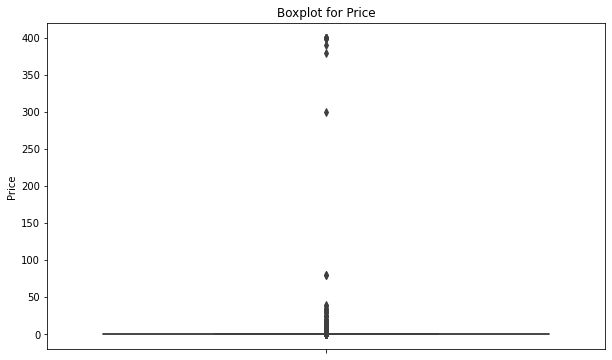

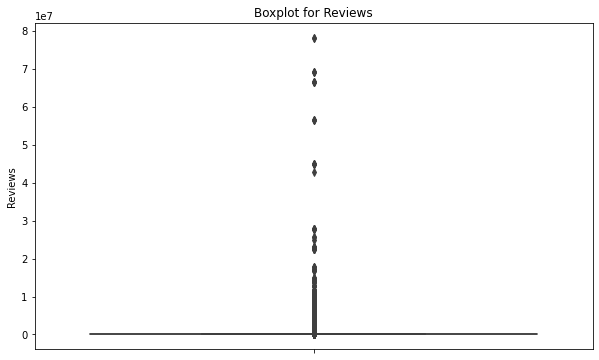

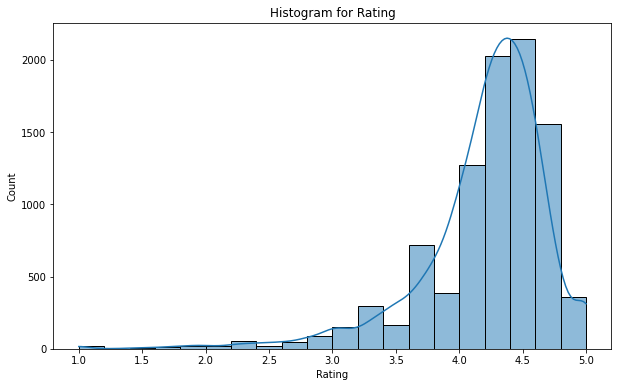

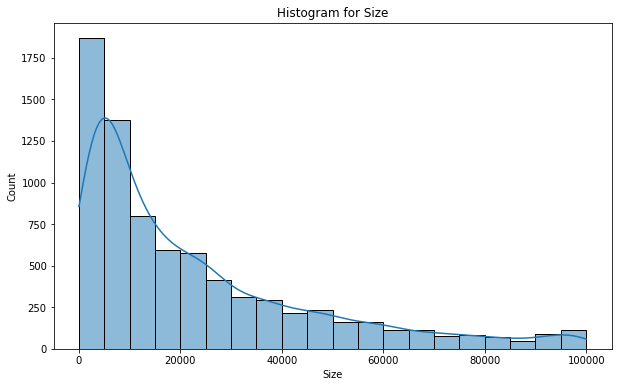

In [6]:
#Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot for Price
plt.figure(figsize=(10,6))
sns.boxplot(y=data['Price'])
plt.title('Boxplot for Price')
plt.show
#There are several outliers for Price which ranges between 300 and 400.
#Most of the apps appear to be free as most of the data gathers around the 0 value.

#Boxplot for Reviews
plt.figure(figsize=(10,6))
sns.boxplot(y='Reviews', data=data)
plt.title('Boxplot for Reviews')
plt.show
#Reviews have some outliers as some of the apps have high numbers of reviews.
#The outlier appear to be almost 80 millions reviews.

#Histogram for Rating
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Histogram for Rating')
plt.show
#The distribution seem to be more populated around the high rating area.
#Most apps seem to receive high rating.

#Histogram for Size
plt.figure(figsize=(10,6))
sns.histplot(data['Size'], bins=20, kde=True)
plt.title('Histogram for Size')
plt.show
#The distribution is skewed to the right.
#Only few of the apps have large size which is normal.

In [7]:
data = data[data['Price'] <= 200]
data = data[data['Reviews'] <= 2000000]

percentiles = [10,25,50,70,90,95,99]
install_percentiles = np.percentile(data['Installs'],percentiles)

for p,percentile in zip(percentiles,install_percentiles):
    print(f"{p}th percentile: {percentile:.0f} installs")
    
install_threshold = install_percentiles[5]

data = data[data['Installs'] < install_threshold]

10th percentile: 1000 installs
25th percentile: 10000 installs
50th percentile: 500000 installs
70th percentile: 1000000 installs
90th percentile: 10000000 installs
95th percentile: 10000000 installs
99th percentile: 100000000 installs


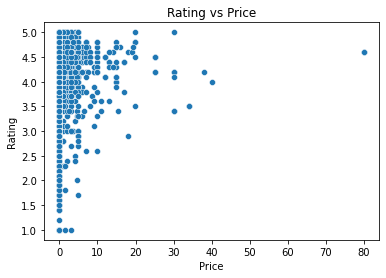

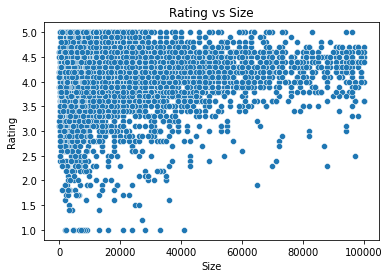

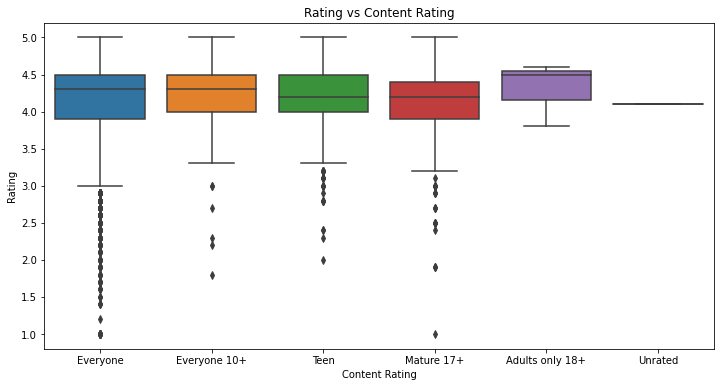

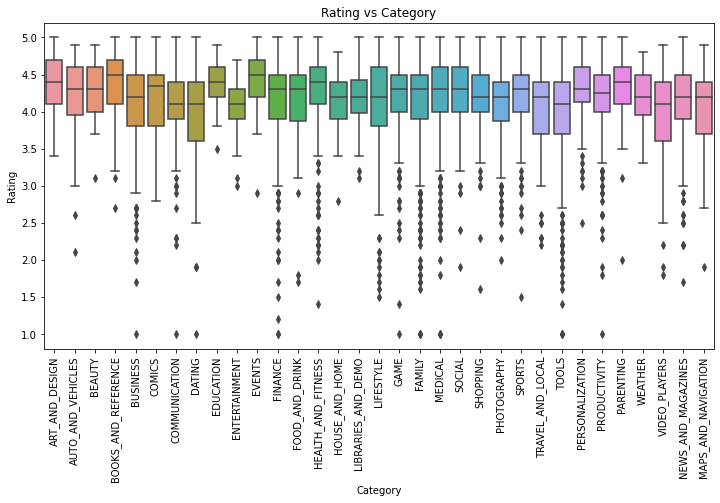

In [8]:
#Bivariate analysis

#Scatter plot (Rating vs Price)
sns.scatterplot(x='Price', y='Rating', data=data)
plt.title('Rating vs Price')
plt.show()
#There seem to be no correlation between the variables.

#Scatter plot (Rating vs Size)
sns.scatterplot(x='Size', y='Rating', data=data)
plt.title('Rating vs Size')
plt.show()
#There seem to be no correlation between the variables.

#Box plot (Rating vs Content Rating)
plt.figure(figsize=(12,6))
sns.boxplot(x='Content Rating', y='Rating', data=data)
plt.title('Rating vs Content Rating')
plt.show()
#Adults only +18 have smaller distribution and also the highest median with no outlier.
#Most of the content rating have about the same rating median.

#Box plot (Rating vs Category)
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Rating', data=data)
plt.title('Rating vs Category')
plt.xticks(rotation=90)
plt.show()
#Each category have different distribution.
#Book & References and Events categories seem to have the highest median rating.

In [9]:
#Data preprocessing

inp1 = data.copy()

inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

columns_to_drop = ['App', 'Last Updated', 'Current Ver', 'Android Ver']
inp1 = inp1.drop(columns=columns_to_drop)

inp2 = pd.get_dummies(inp1, columns = ['Category', 'Genres', 'Content Rating', 'Type'])
                      
print(inp2.head())

   Rating    Reviews     Size   Installs  Price  Category_ART_AND_DESIGN  \
0     4.1   5.075174  19000.0   9.210440    0.0                        1   
1     3.9   6.875232  14000.0  13.122365    0.0                        1   
2     4.7  11.379520   8700.0  15.424949    0.0                        1   
4     4.3   6.875232   2800.0  11.512935    0.0                        1   
5     4.4   5.123964   5600.0  10.819798    0.0                        1   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                           0                0                             0   
1                           0                0                             0   
2                           0                0                             0   
4                           0                0                             0   
5                           0                0                             0   

   Category_BUSINESS  ...  Genres_Weather  Genres_Word  \
0   

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

X = inp2.drop(columns=['Rating'])
y = inp2['Rating']

imputer = SimpleImputer(strategy = 'mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = 0.3, random_state = 42)

#Initialize the Linear Regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

#Make predictions on training set
y_train_pred = model.predict(X_train)

#Calculate R2 score on training set
r2_train = r2_score(y_train, y_train_pred)
print(f"R2 on train set: {r2_train:.2f}")

#Make predictions on test set
y_test_pred = model.predict(X_test)

#Calculate R2 score on test set
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 on test set: {r2_test:.2f}")

R2 on train set: 0.16
R2 on test set: 0.11
